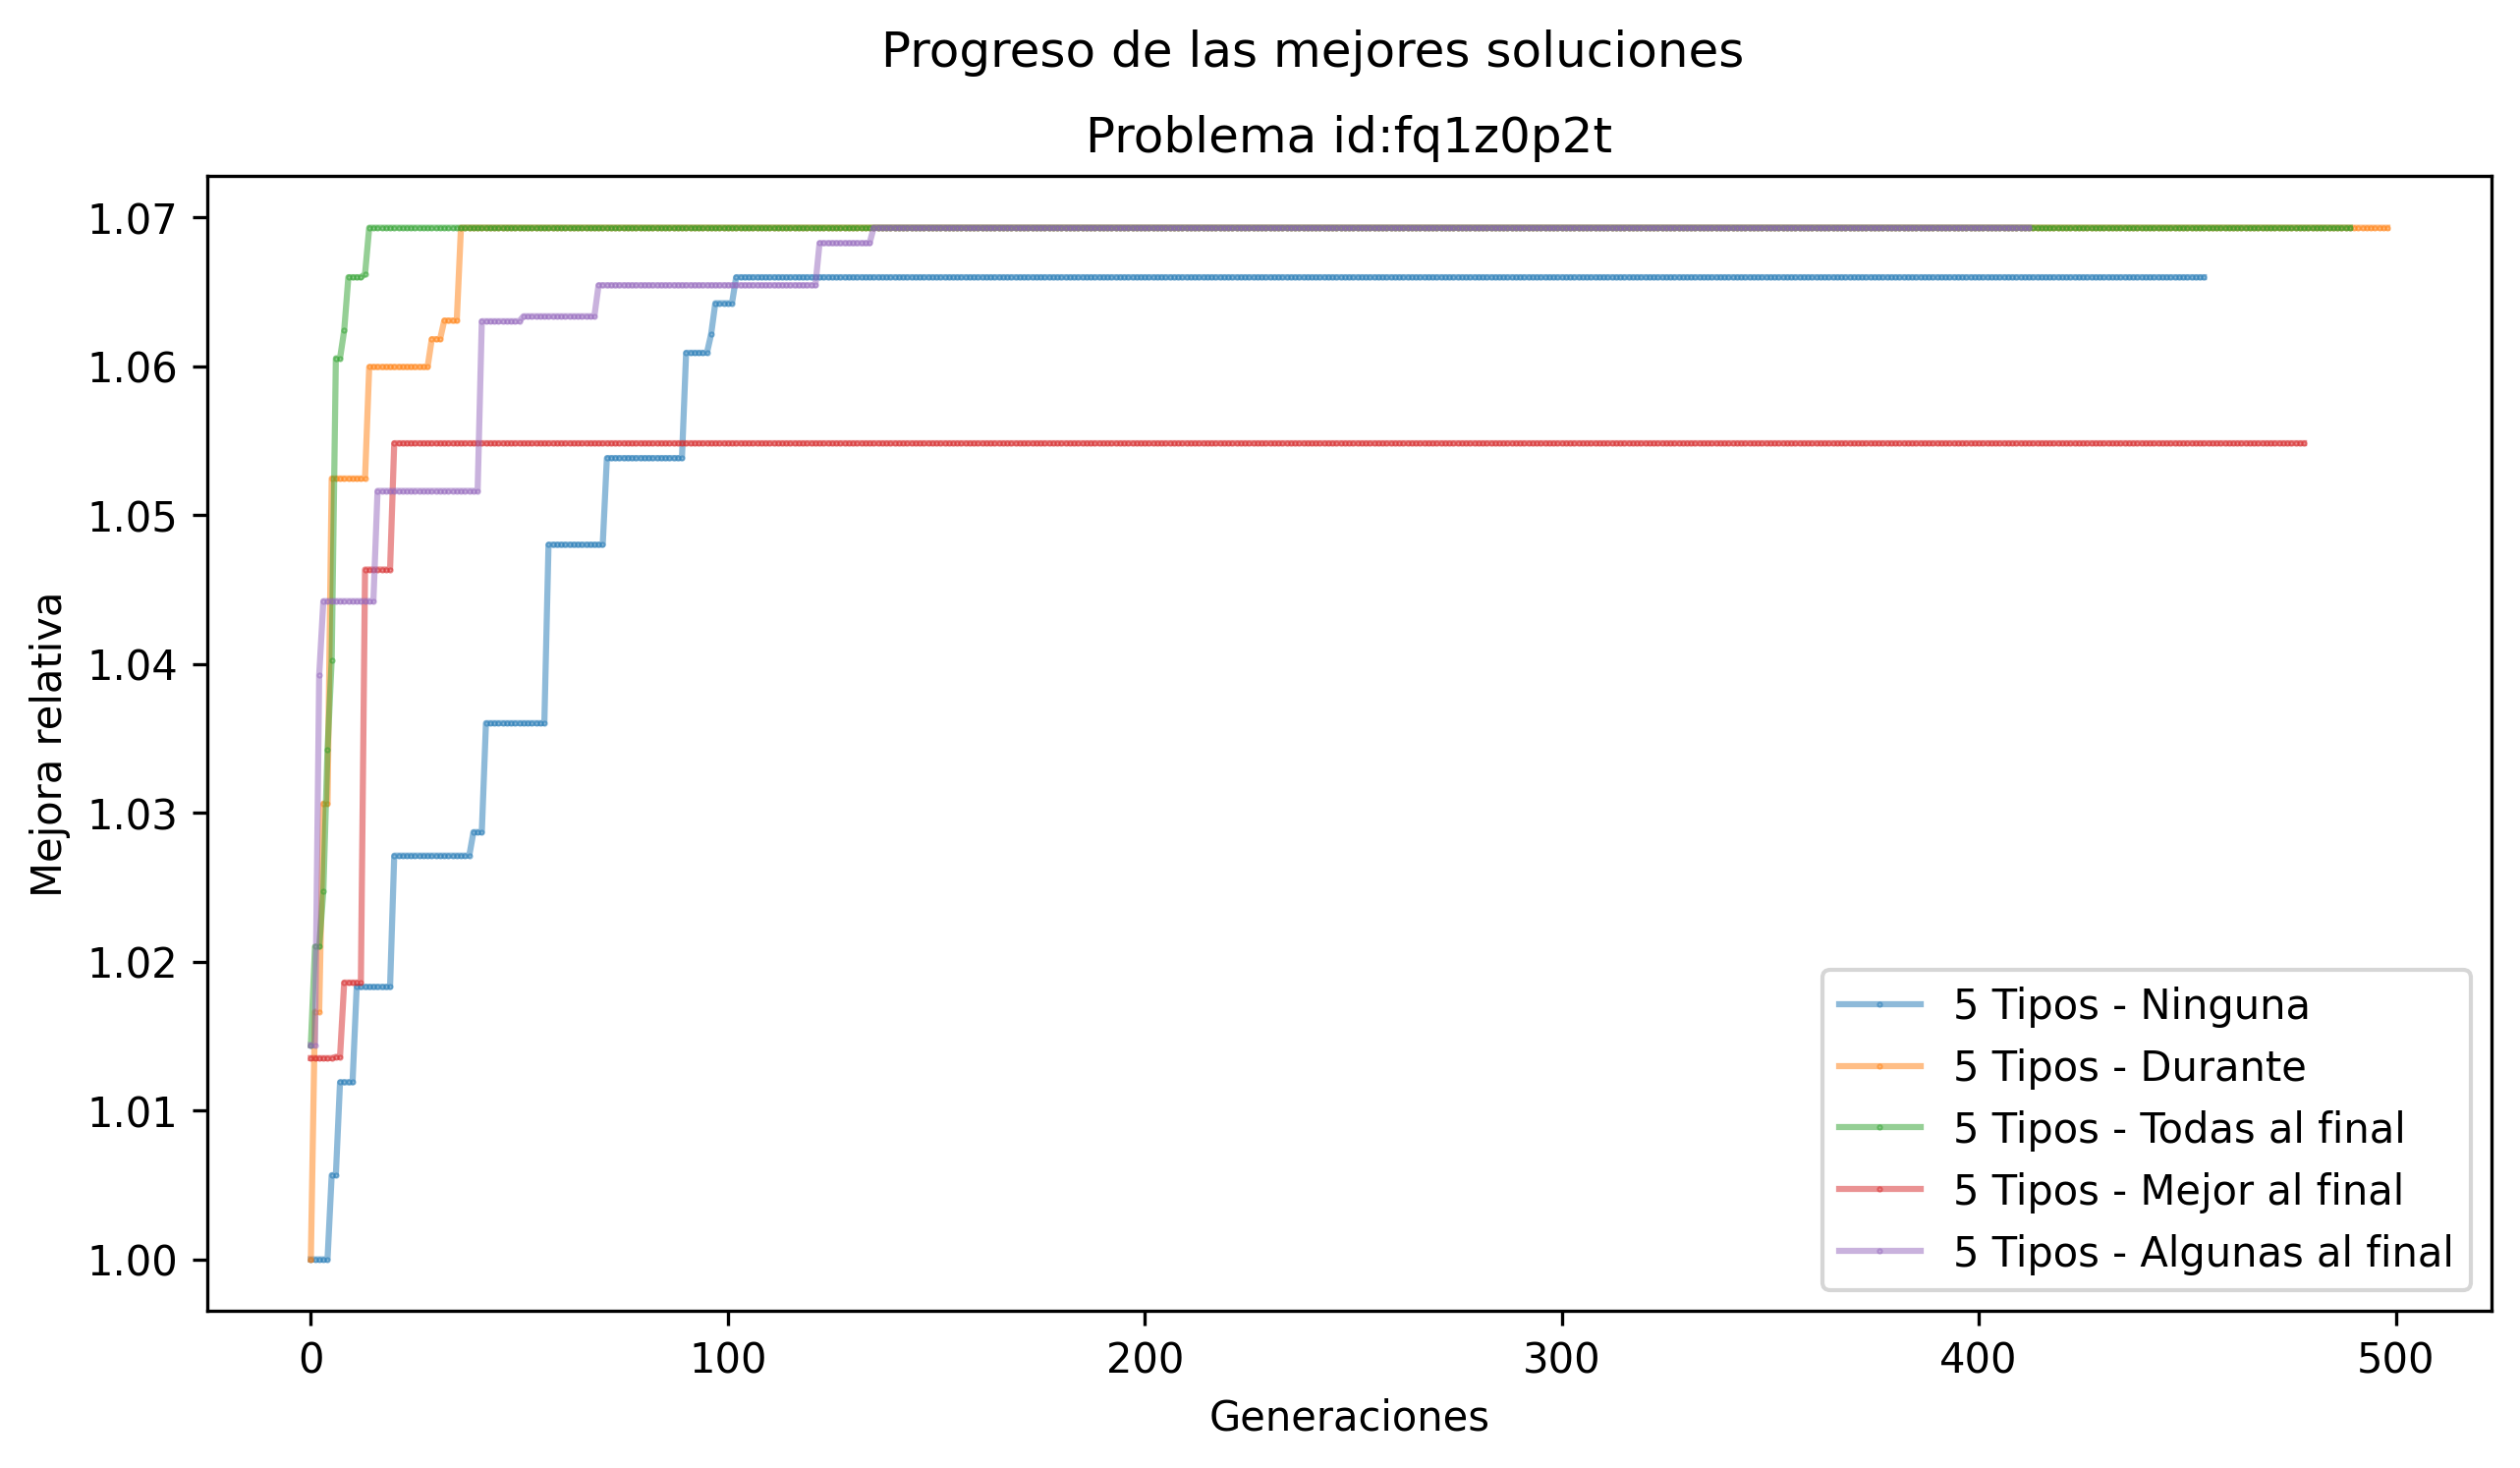

IndexError: list index out of range

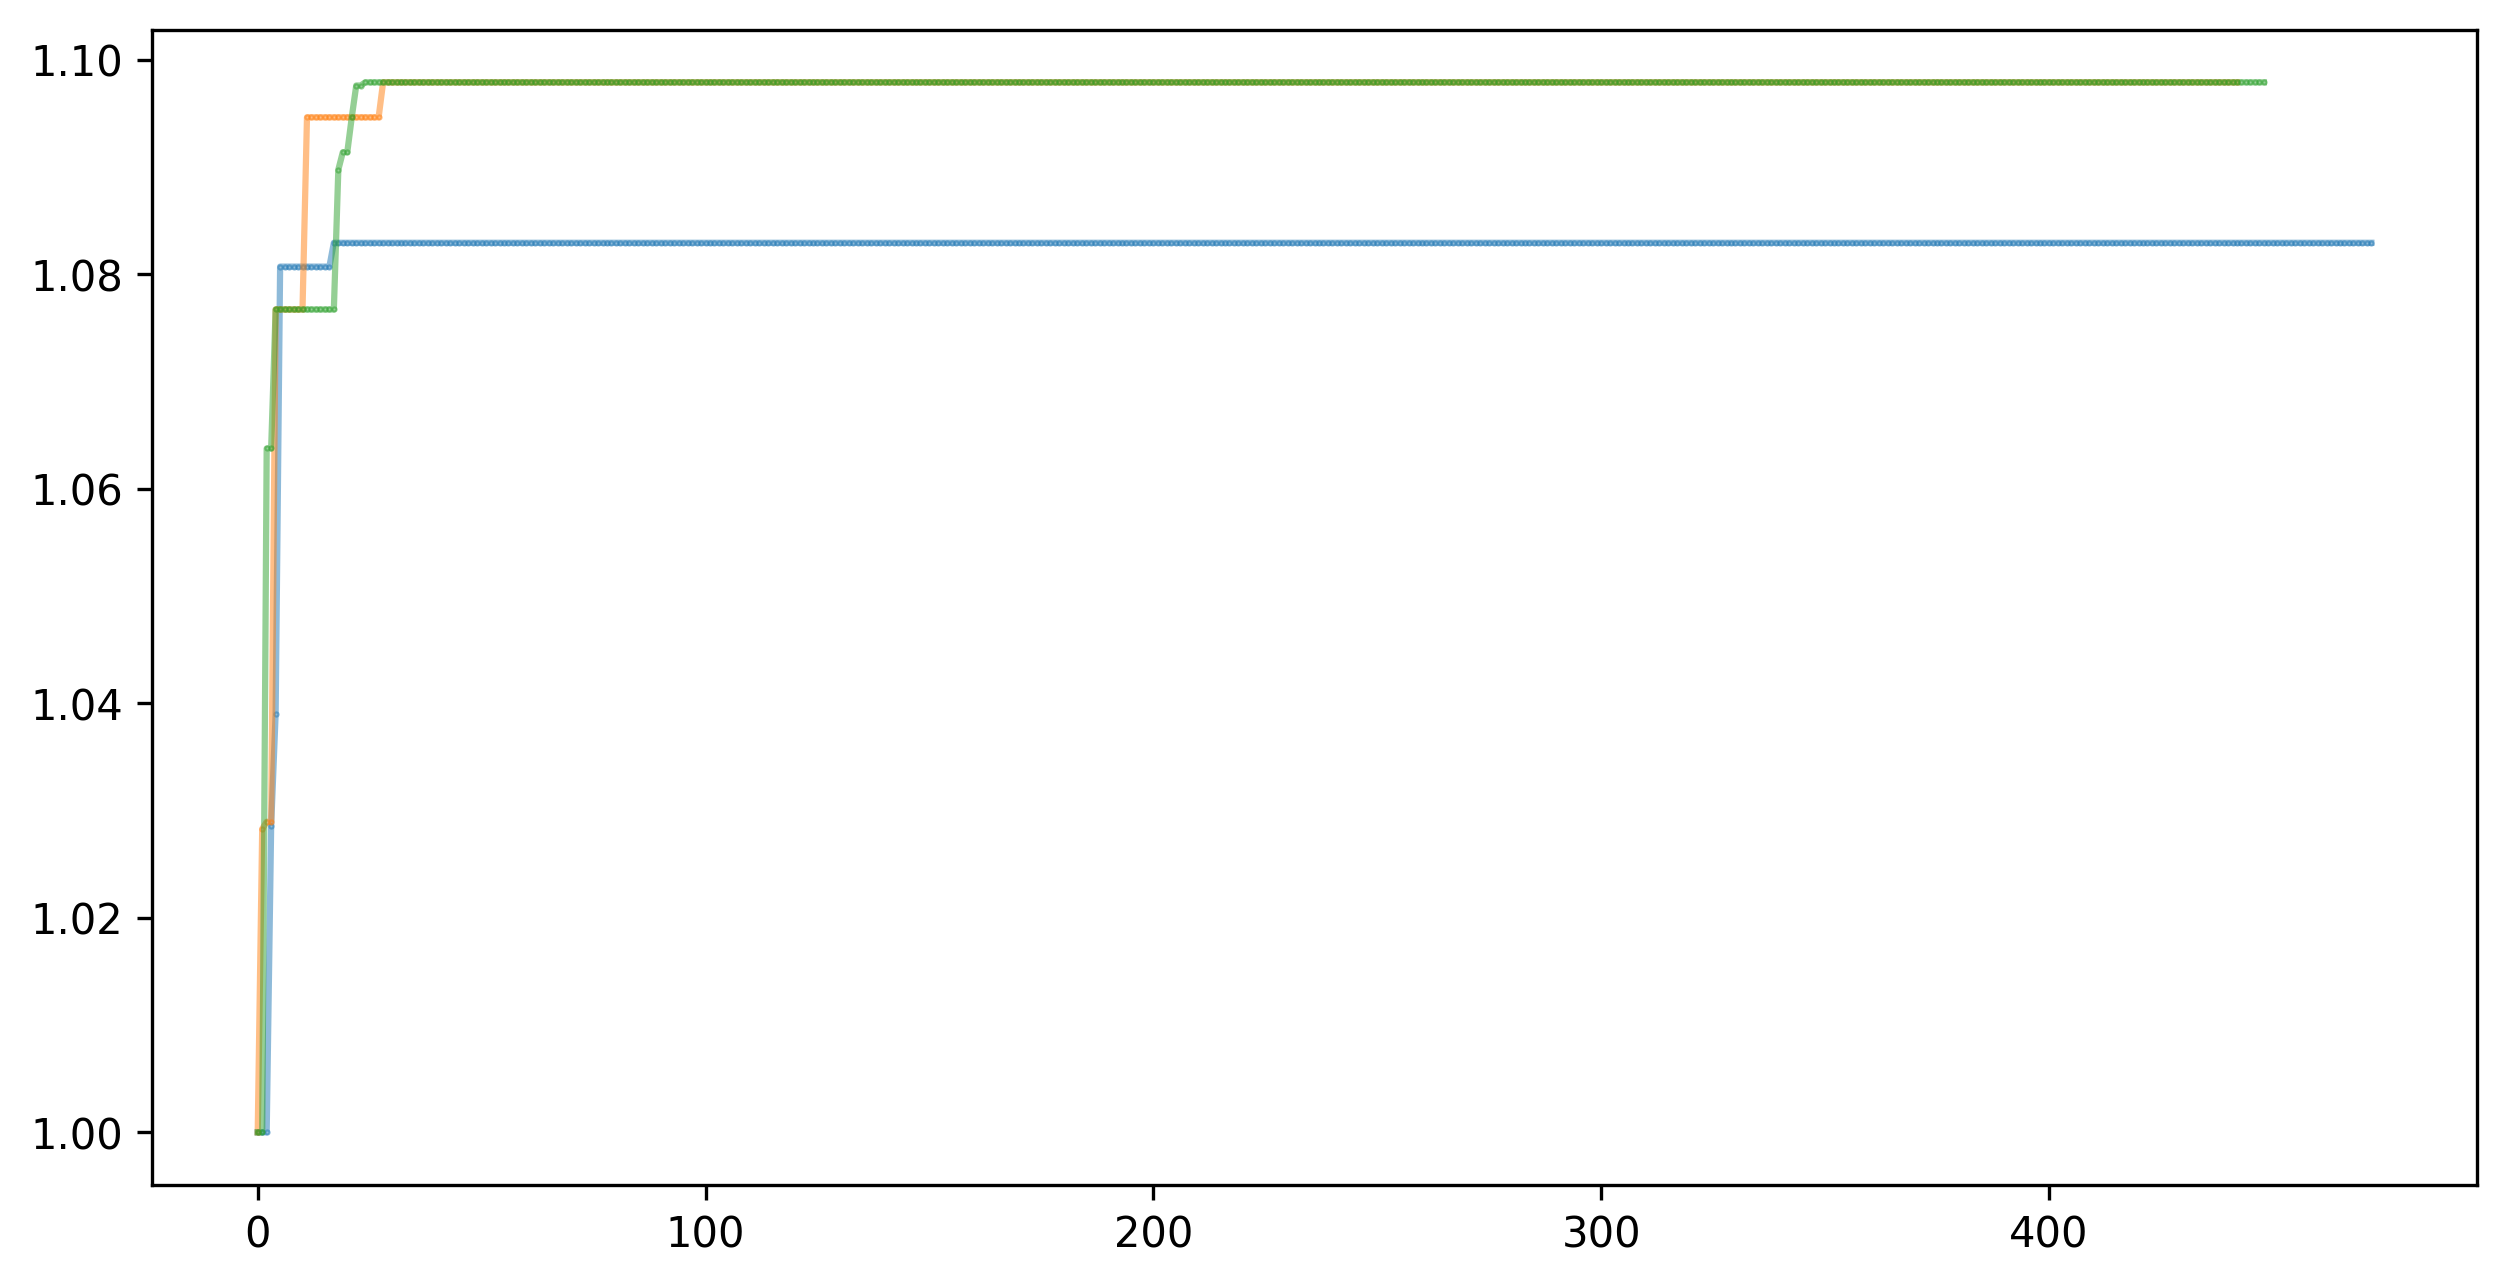

In [7]:

#Leer el archivo results.txt linea por linea
import json
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
#%config InlineBackend.figure_format = 'svg'
plt.rcParams['figure.figsize'] = [10, 5]
plt.rcParams['figure.dpi'] = 300


results = []
with open('results.txt', 'r', encoding='utf-8', newline='\n') as r: 
    for line in r:
        json_line = json.loads(line)
        results.append(json_line)

i = 0

mejoras = {
    "none": "Ninguna",
    "during":"Durante",
    "late_all":"Todas al final",
    "late_best":"Mejor al final",
    "late_some":"Algunas al final"
}

winners = {
    "none": [0,0,0,0],
    "during":[0,0,0,0],
    "late_all":[0,0,0,0],
    "late_best":[0,0,0,0],
    "late_some":[0,0,0,0]
}

# Graficar los progresos en ggplot2
for i in range(0, len(results), 5):
    result_part = results[i:i+5]
    best_group = max(result_part, key=lambda pair: pair['best_value'][2])
    best_type = (best_group['types_count']//5)-1
    winners[best_group['group_improvement']][best_type] += 1
    
    
    max_v = 0
    for j in range(5):
        r = results[i+j]
        values = [v/r['default_max_fitness'][2] for v in r['best_values']]
        max_v = max(max_v, max(values))
        plt.plot(values, marker = ".", 
                 markersize = 1, alpha=0.5, fillstyle='none')
    plt.legend(['%s Tipos - %s' %(r['types_count'], mejoras[r['group_improvement']]) for r in results[i:i+5]])
    plt.ylabel('Mejora relativa')
    #plt.ylim([0.95, max_v+ 0.05])
    plt.xlabel('Generaciones')
    plt.title('Problema id:%s' % r['problem_id'])
    plt.suptitle('Progreso de las mejores soluciones')
    plt.show()
    
# hacer medias para la mejora de cada tipoo



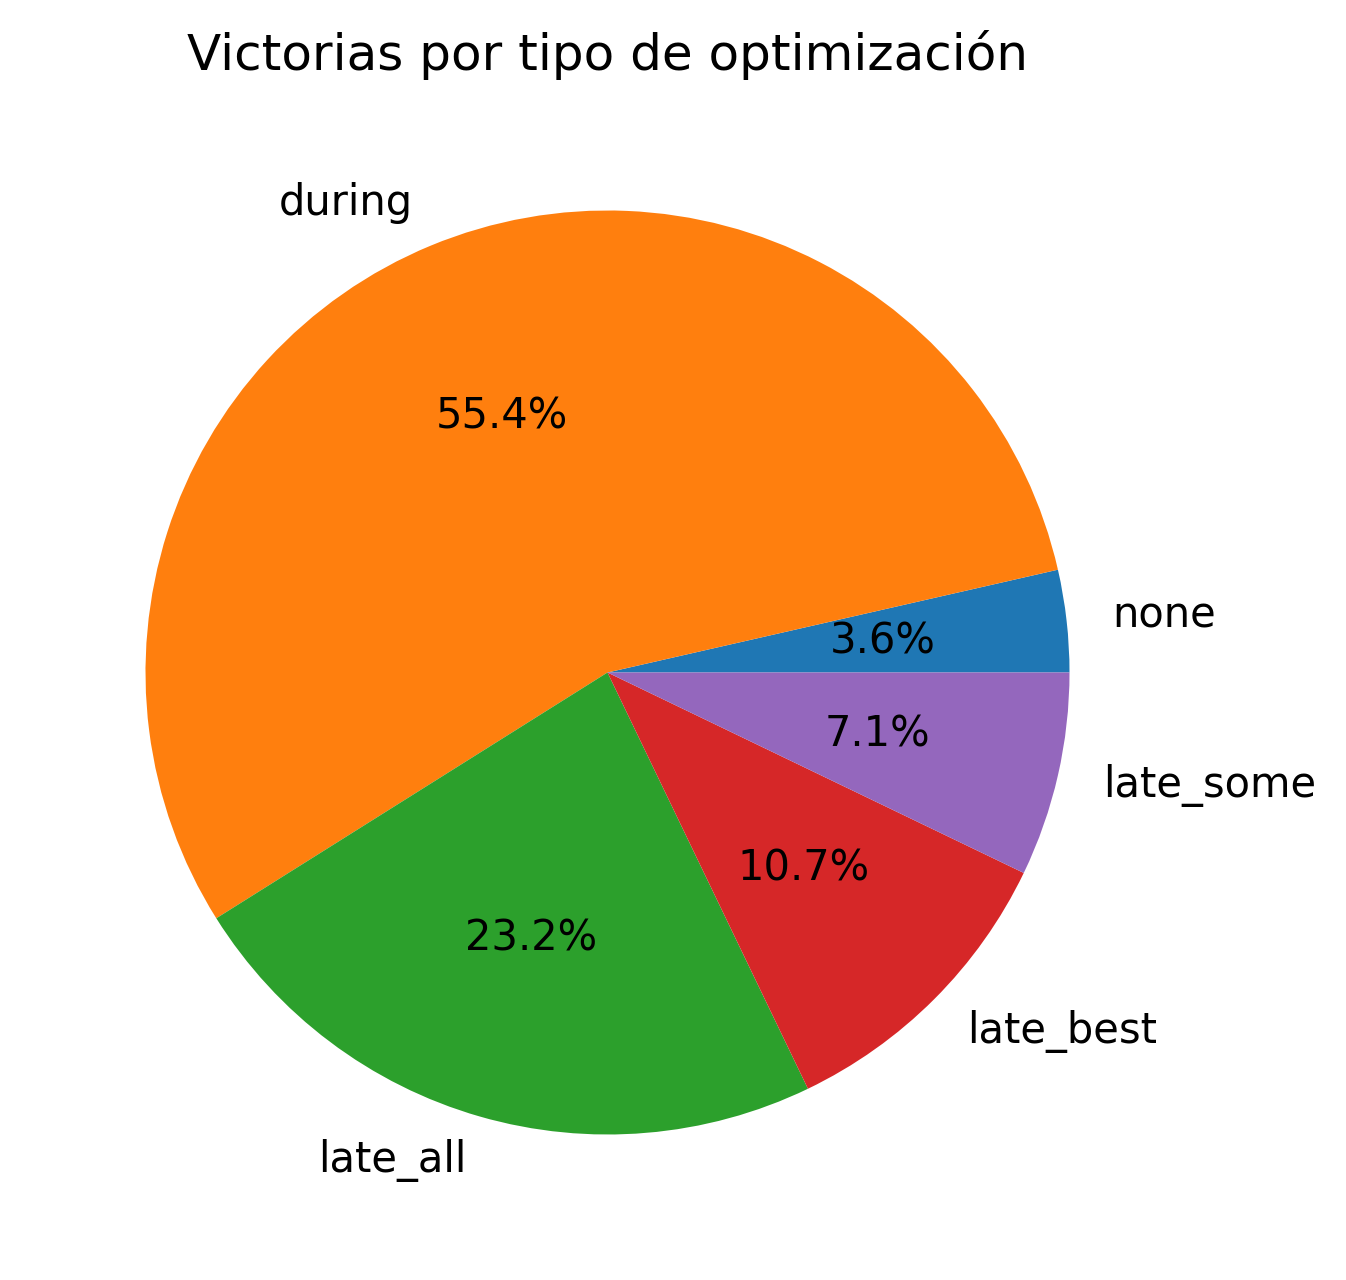

In [ ]:
fig, ax = plt.subplots()
ax.pie([sum(w) for w in winners.values()],
       labels=winners.keys(), autopct='%1.1f%%')
ax.set_title('Victorias por tipo de optimización')
plt.show()

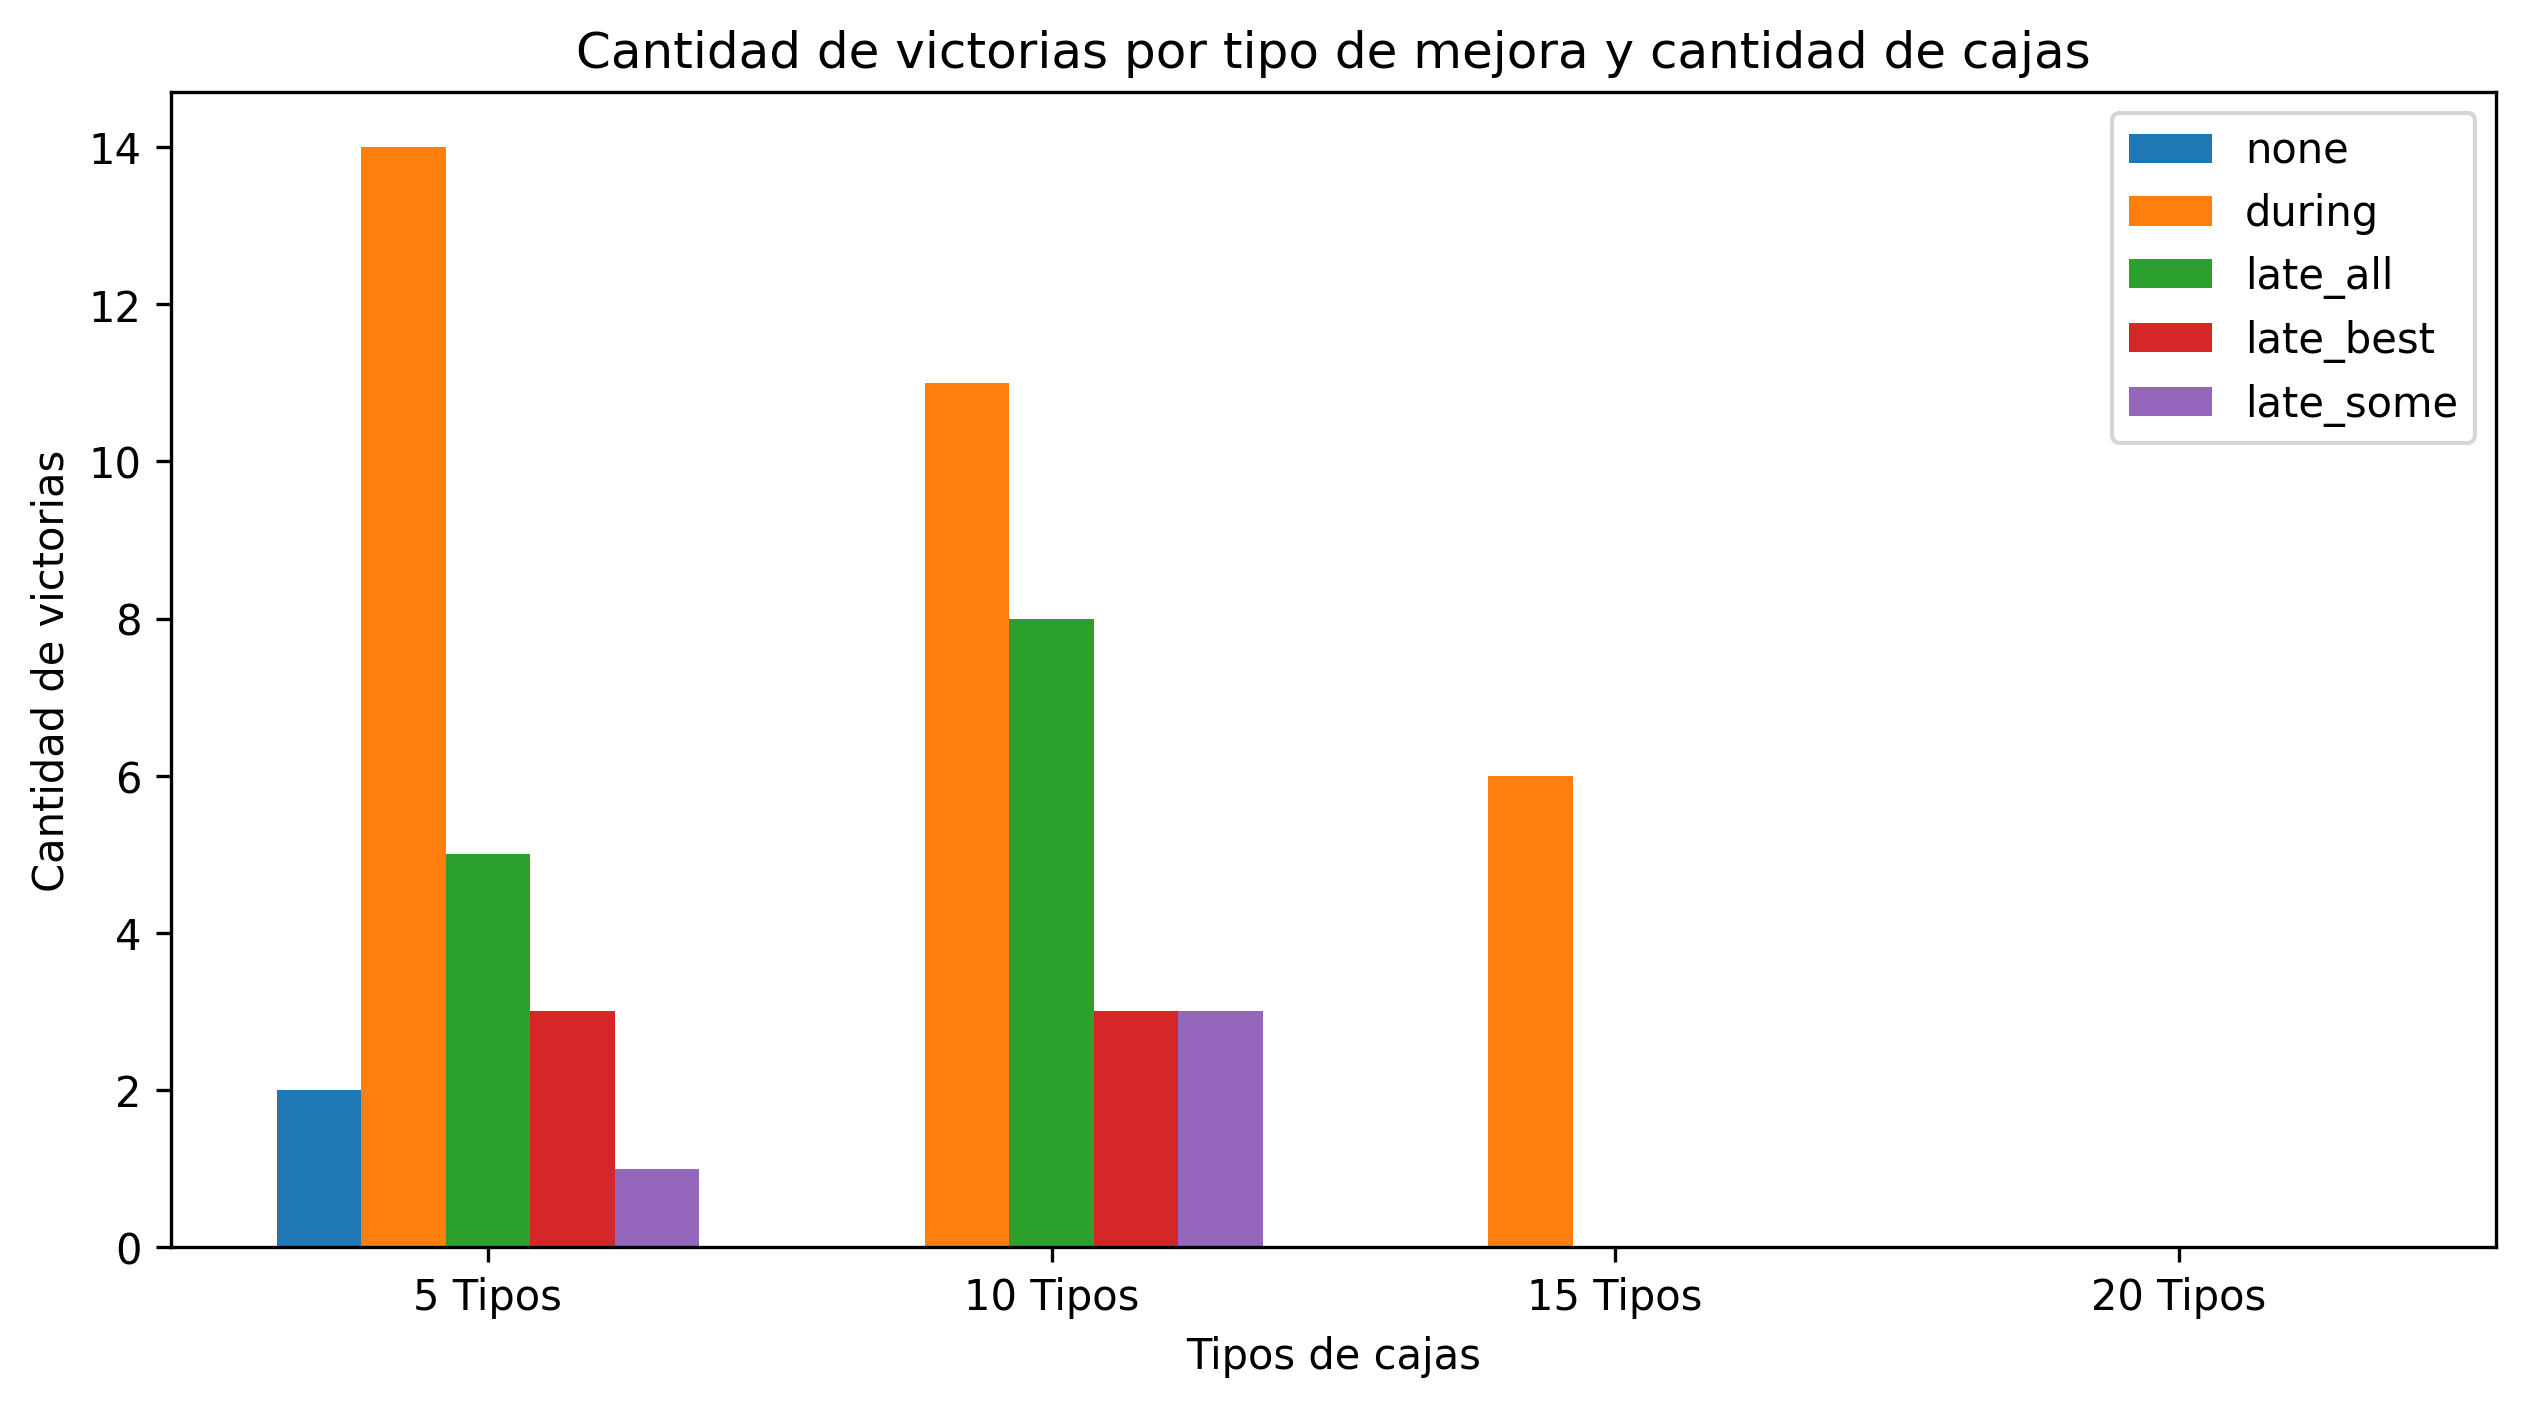

In [ ]:
tipos_mejora = list(winners.keys())
cantidad_configuraciones = len(winners['none'])

# Graficar
fig, ax = plt.subplots()

# Iterar sobre cada tipo de mejora y graficar sus valores
for i, tipo in enumerate(tipos_mejora):
    ax.bar([x + i*0.15 for x in range(cantidad_configuraciones)],
           winners[tipo], width=0.15, label=tipo)

# Configurar ejes y leyenda
ax.set_xticks([x + 0.3 for x in range(cantidad_configuraciones)])
ax.set_xticklabels(
    [f'{(i+1)*5} Tipos' for i in range(cantidad_configuraciones)])
ax.set_xlabel('Tipos de cajas')
ax.set_ylabel('Cantidad de victorias')
ax.set_title('Cantidad de victorias por tipo de mejora y cantidad de cajas')
ax.legend()

# Mostrar el gráfico
plt.show()

NameError: name 'np' is not defined

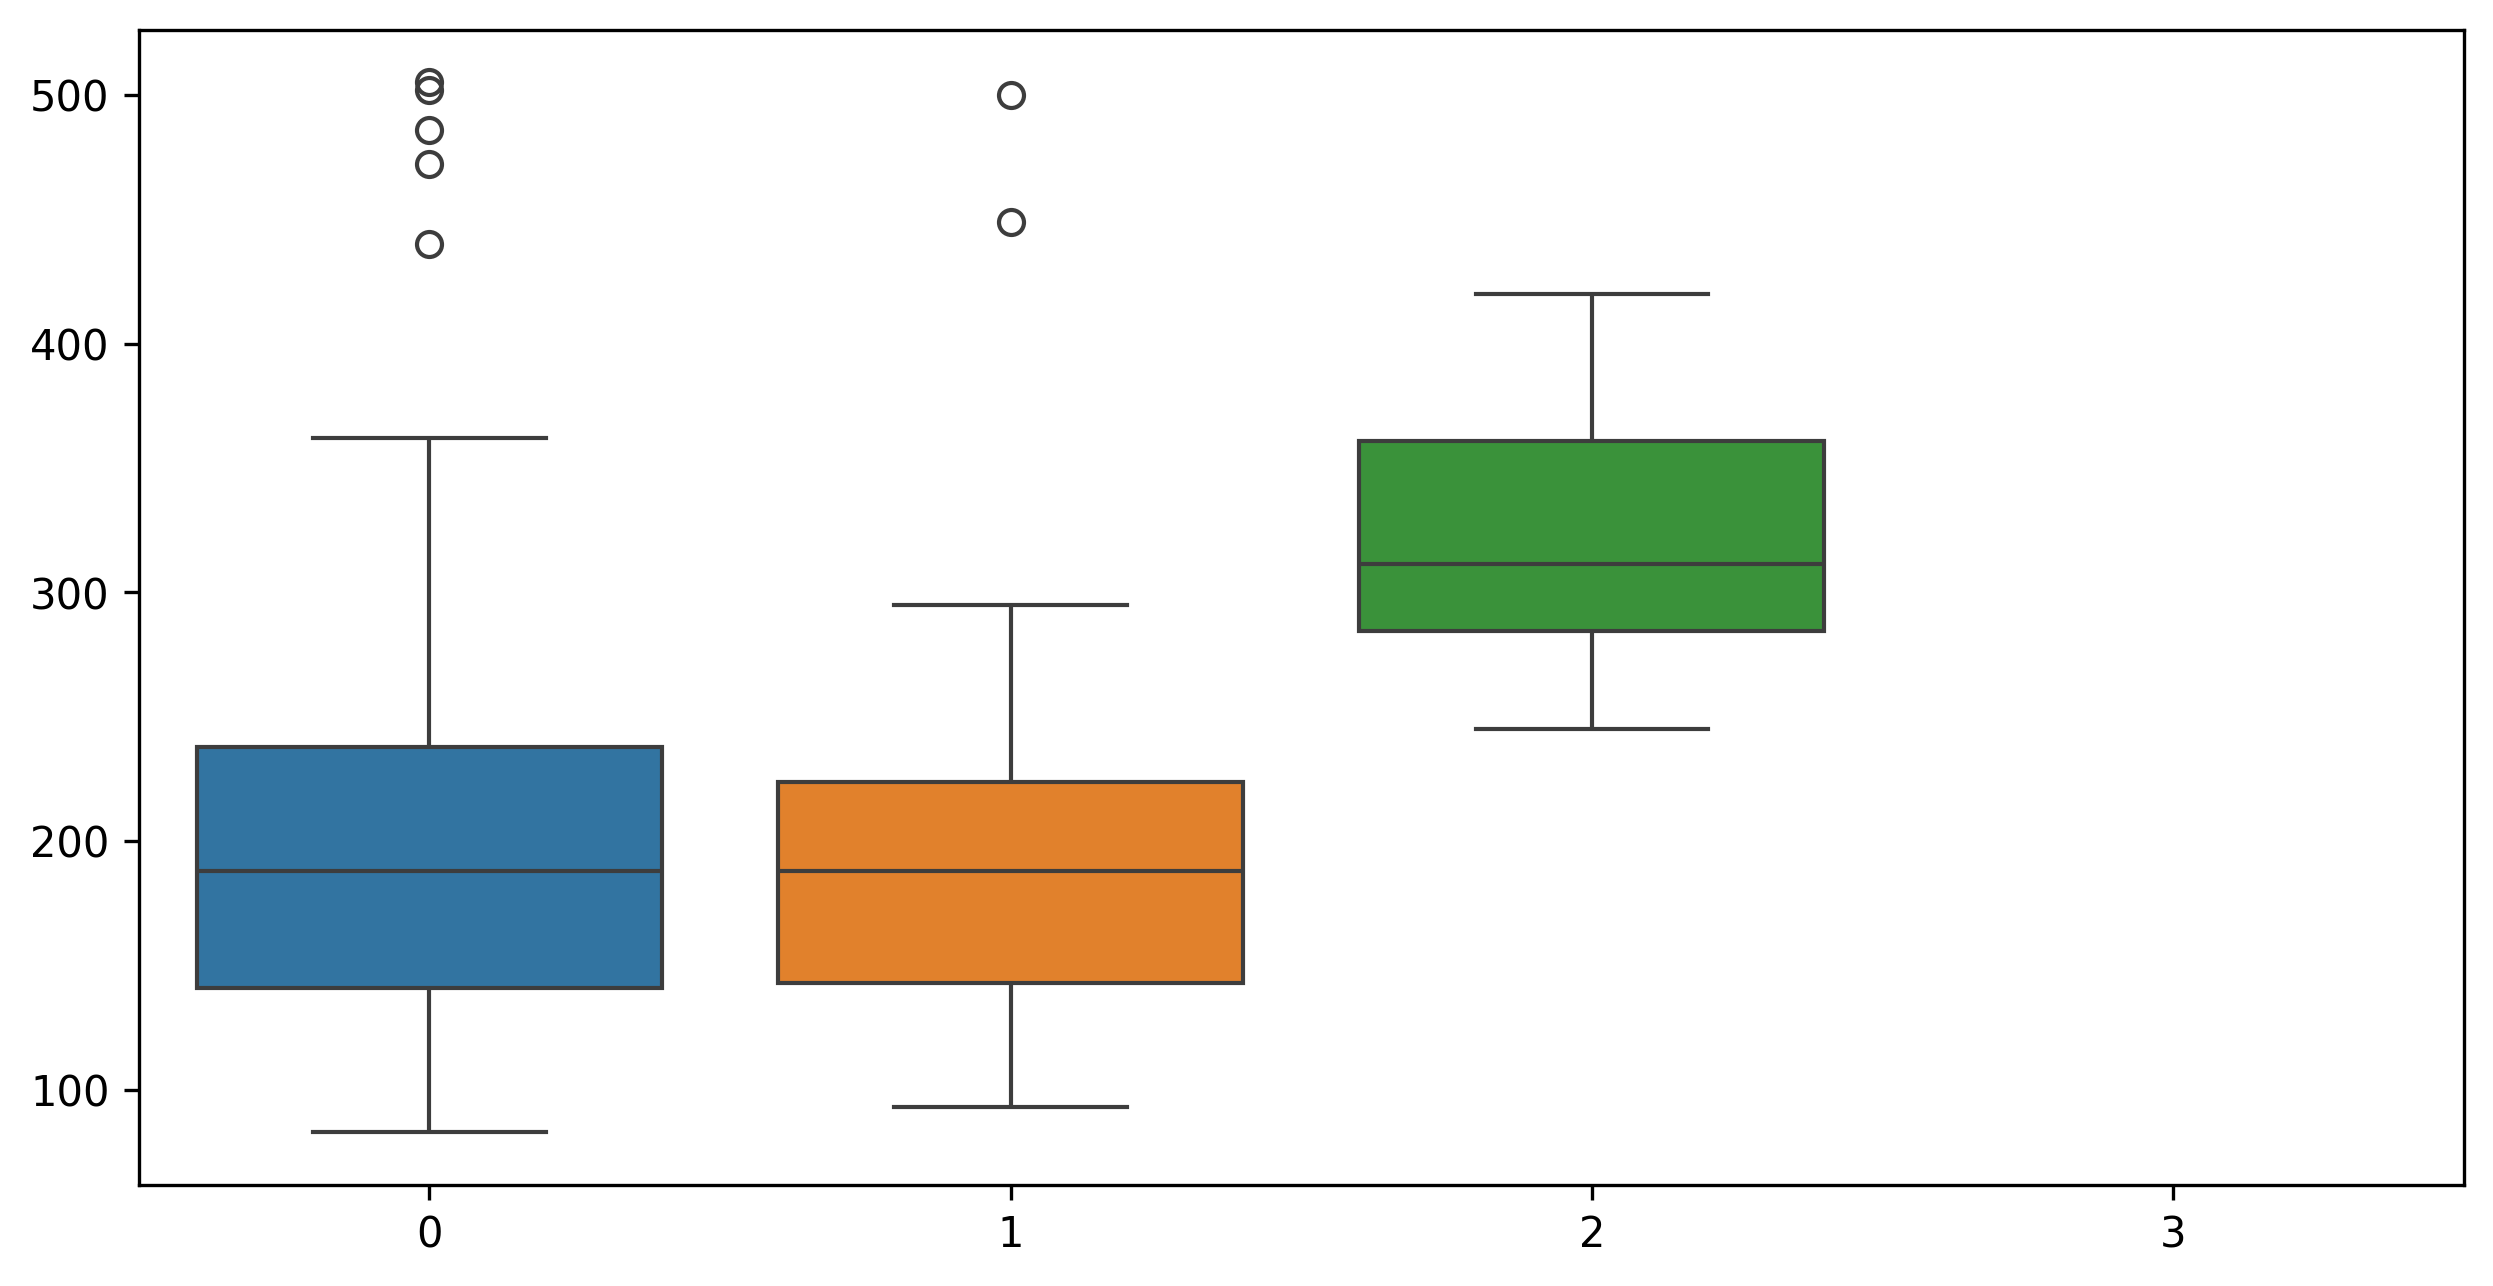

In [ ]:
types_count = {
    5: [],
    10: [],
    15: [],
    20: []
}
for r in results:
    types_count[r['types_count']].append(r['generations'])

fig, ax = plt.subplots()
sns.boxplot(data=[types_count[5], types_count[10], types_count[15], types_count[20]])
ax.set_xticks(np.arange(4))
ax.set_xticklabels(["5 Tipos", "10 Tipos", "15 Tipos", "20 Tipos"])
ax.set_xlabel('Tipos de cajas')
ax.set_ylabel('Generaciones')
ax.set_title('Distribución de generaciones por cantidad de cajas')
plt.show()

In [ ]:
types_count = {
    "none": [],
    "during": [],
    "late_all": [],
    "late_best": [],
    "late_some": []
}

for r in results:
    types_count[r['group_improvement']].append(r['generations'])

fig, ax = plt.subplots()
sns.boxplot(data=[types_count["none"], types_count["during"], types_count["late_all"], types_count["late_best"], types_count["late_some"]])
ax.set_xticks(np.arange(5))
ax.set_xticklabels(["Ninguna", "Durante", "Todas al final", "Mejor al final", "Algunas al final"])
ax.set_xlabel('Tipo de mejora')
ax.set_ylabel('Generaciones')
ax.set_title('Distribución de generaciones por tipo de mejora')
plt.show()

In [ ]:
types_count = {
    "none": [],
    "during": [],
    "late_all": [],
    "late_best": [],
    "late_some": []
}

for r in results:
    for t in r['timings']['generations_time']:
        types_count[r['group_improvement']].append(t)

fig, ax = plt.subplots()
sns.boxplot(data=[types_count["none"], types_count["during"], types_count["late_all"], types_count["late_best"], types_count["late_some"]])
ax.set_xticks(np.arange(5))
ax.set_xticklabels(["Ninguna", "Durante", "Todas al final", "Mejor al final", "Algunas al final"])
ax.set_xlabel('Tipo de mejora')
ax.set_ylabel('Tiempo por generación (segundos)')
ax.set_title('Distribución de tiempo por generación por tipo de mejora')
plt.show()

In [ ]:
# Cantidad de cajas por tipo de caja

types_count = {
    5: [],
    10: [],
    15: [],
    20: []
}
for r in results:
    types_count[r['types_count']].append(sum([x[1] for x in r['best_solution']]))
    
fig, ax = plt.subplots()
sns.boxplot(data=[types_count[5], types_count[10], types_count[15], types_count[20]])
ax.set_xticks(np.arange(4))
ax.set_xticklabels(["5 Tipos", "10 Tipos", "15 Tipos", "20 Tipos"])
ax.set_xlabel('Tipos de cajas')
ax.set_ylabel('Cantidad de cajas')
ax.set_title('Distribución de cantidad de cajas por tipos de cajas')
plt.show()

In [ ]:
#Gráfico de cantidad de cajas vs generaciones

fig, ax = plt.subplots()
sns.scatterplot(x=[x['types_count'] for x in results], y=[x['generations'] for x in results])
ax.set_xlabel('Tipos de cajas')
ax.set_ylabel('Generaciones')
ax.set_title('Cantidad de cajas vs generaciones')
plt.show()